In [42]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [10]:
ROOT = '/content/drive"'

In [45]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [30]:
!git add .

In [31]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [32]:
!git commit -m "testing out some ddpg models, not very good right now"

[main b976b26] testing out some ddpg models, not very good right now
 3 files changed, 1 insertion(+), 1 deletion(-)
 rewrite colab.ipynb (85%)
 create mode 100644 random_model_ddpg.zip
 create mode 100644 real_model_ddpg.zip


In [53]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [4]:
!git pull origin

Already up to date.


In [33]:
!git push origin

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 5.07 MiB | 7.21 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ahhuang007/Sebastian.git
   ec85b52..b976b26  main -> main


Installing stable_baselines since it might be better

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks


In [44]:
!pip install stable-baselines3[extra]

  Using cached gym-0.19.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym-seb 0.0.4 requires gym>=0.20.0, but you have gym 0.19.0 which is incompatible.


Installing my custom environment

In [1]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content


In [12]:
%cd gym-seb

/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [14]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/Sebastian/gym-seb
  Running setup.py develop for gym-seb


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)
print(env.observation_space)

Box([-100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000.], [100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.], (27,), float32)


In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


In [5]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['rewards'][0])


In [7]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 10000
-5.860852979822084e-06
maximum timestep reached for episode
resetting environment
at episode 20000
-8.40593486373109e-07
maximum timestep reached for episode
resetting environment
at episode 30000
-0.00011059834650950506
maximum timestep reached for episode
resetting environment
at episode 40000
-1.236114144376188e-06
maximum timestep reached for episode
resetting environment
at episode 50000
-9.116599244407553e-07
maximum timestep reached for episode
resetting environment
at episode 60000
-1.2690676385318511e-06
maximum timestep reached for episode
resetting environment
at episode 70000
-3.049076985917054e-05
maximum timestep reached for episode
resetting environment
at episode 80000
-2.0761358427989762e-06
maximum timestep reached for episode
resetting environment
at episode 90000
-1.4275019566412084e-06
maximum timestep reached for episode
resetting environment
at episode 100000
-9.201451121043647e-07
maximum timestep reached for episode
resett

In [8]:
model.save("random_model_ppo")

In [8]:
model = PPO.load("real_model_ppo", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

In [11]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
data = []
record = Recorder(data, log_dir = "/")
ppo_model = ppo_model.learn(total_timesteps = 4096, log_interval = 10000, callback = record)
ppo_model.save("real_model_ppo")

resetting environment
resetting environment
robot has flipped over at timestep 102909
resetting environment
robot has flipped over at timestep 103142
resetting environment
robot has flipped over at timestep 103302
resetting environment
robot has flipped over at timestep 103710
resetting environment
robot has flipped over at timestep 103971
resetting environment
robot has flipped over at timestep 104069
resetting environment
robot has flipped over at timestep 104267
resetting environment
robot has flipped over at timestep 104570
resetting environment
robot has flipped over at timestep 105285
resetting environment
robot has flipped over at timestep 105867
resetting environment


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

Plotting

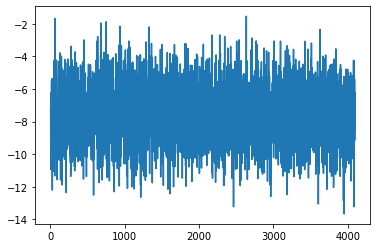

In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
xs = range(1, len(data) + 1)
plt.plot(xs, data)
plt.show()

In [19]:
xs

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.094e+03, 4.095e+03,
       4.096e+03])

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken, 

In [21]:
#Testing DDPG

ddpg_model = DDPG('MlpPolicy', env, verbose = 1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [23]:
ddpg_model.save("random_model_ddpg")

In [38]:
ddpg_model = DDPG.load("real_model_ddpg", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [39]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

ddpg_model = ddpg_model.learn(total_timesteps = 1000, log_interval = 100)
ddpg_model.save("real_model_ddpg")

resetting environment
resetting environment
at episode 10000
(-0.011231030710797282, -0.007286626956947016, 0.016863324466127927)
max timesteps reached
resetting environment


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")